In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [79]:
data=pd.read_csv('FTSE.csv',index_col=0,parse_dates=True,na_values=["",".","0","null"])

In [80]:
data.head(3)

,FTSE 100,OILB,OILT,GBP/EURO,GBP/CNY,GOLD,SONIA,GBP/USD,3LIBOR,6LIBOR
Date,,,,,,,,,,
2009-01-02,4561.8,29.611424,31.838832,1.0407,9.8940,599.7796,1.5620,1.4502,2.7050,2.90
2009-01-05,4579.6,31.469160,33.370765,1.0684,9.9493,590.3900,1.5835,1.4567,2.6475,2.85
2009-01-06,4638.9,33.289201,33.064504,1.0979,10.0393,574.6796,1.5881,1.4686,2.6138,2.82


In [81]:
corr=data.corr()
corr

,FTSE 100,OILB,OILT,GBP/EURO,GBP/CNY,GOLD,SONIA,GBP/USD,3LIBOR,6LIBOR
FTSE 100,1.000000,-0.018939,-0.039593,0.022195,-0.749888,0.470151,-0.156594,-0.576271,-0.604602,-0.698530
OILB,-0.018939,1.000000,0.965134,-0.232656,0.283127,0.367791,0.086369,0.434863,0.016506,0.068158
OILT,-0.039593,0.965134,1.000000,-0.273274,0.339481,0.243139,0.031441,0.463078,-0.017393,0.036701
GBP/EURO,0.022195,-0.232656,-0.273274,1.000000,0.107319,-0.250482,-0.149109,0.330335,-0.232358,-0.208115
GBP/CNY,-0.749888,0.283127,0.339481,0.107319,1.000000,-0.553764,0.055728,0.890155,0.262119,0.377552
GOLD,0.470151,0.367791,0.243139,-0.250482,-0.553764,1.000000,0.049545,-0.477219,-0.174608,-0.179125
SONIA,-0.156594,0.086369,0.031441,-0.149109,0.055728,0.049545,1.000000,-0.050722,0.686952,0.608111
GBP/USD,-0.576271,0.434863,0.463078,0.330335,0.890155,-0.477219,-0.050722,1.000000,0.102088,0.198267
3LIBOR,-0.604602,0.016506,-0.017393,-0.232358,0.262119,-0.174608,0.686952,0.102088,1.000000,0.976496
6LIBOR,-0.698530,0.068158,0.036701,-0.208115,0.377552,-0.179125,0.608111,0.198267,0.976496,1.000000


In [82]:
corr['FTSE 100'].sort_values(ascending=False)

FTSE 100    1.000000
GOLD        0.470151
GBP/EURO    0.022195
OILB       -0.018939
OILT       -0.039593
SONIA      -0.156594
GBP/USD    -0.576271
3LIBOR     -0.604602
6LIBOR     -0.698530
GBP/CNY    -0.749888
Name: FTSE 100, dtype: float64

In [83]:
data.drop(['GBP/EURO','OILT','OILB','SONIA'],axis=1,inplace=True)
data

,FTSE 100,GBP/CNY,GOLD,GBP/USD,3LIBOR,6LIBOR
Date,,,,,,
2009-01-02,4561.80,9.8940,599.779600,1.4502,2.7050,2.90
2009-01-05,4579.60,9.9493,590.390000,1.4567,2.6475,2.85
2009-01-06,4638.90,10.0393,574.679600,1.4686,2.6138,2.82
2009-01-07,4507.50,10.3595,569.894400,1.5161,2.5688,2.77
2009-01-08,4505.40,10.3887,554.280750,1.5201,2.5025,2.71
...,...,...,...,...,...,...
2019-12-23,7623.59,9.0642,1147.983720,1.2926,0.7996,0.88
2019-12-24,7632.24,9.0714,1151.383455,1.2948,0.7976,0.88
2019-12-26,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
data.dropna(inplace=True)

In [85]:
mean_12=data['FTSE 100'].rolling(window=12).mean()
mean_26=data['FTSE 100'].rolling(window=26).mean()
mean_12=mean_12.iloc[27:]
mean_26=mean_26.iloc[27:]
data=data.iloc[27:,:]
data['target']=0
for i in range(len(mean_12)):
    if mean_12.iloc[i]<mean_26.iloc[i]:
        data['target'][i]=0
    else:
        data['target'][i]=1
        

C:\Users\sahar\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\sahar\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\sahar\anaconda3\envs\tensorflow_env\lib\site-packages\IPython\core\interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

In [86]:
data

,FTSE 100,GBP/CNY,GOLD,GBP/USD,3LIBOR,6LIBOR,target
Date,,,,,,,
2009-02-11,4234.30,9.8070,642.449600,1.4352,2.0819,2.25,0
2009-02-12,4202.20,9.7378,662.593600,1.4248,2.0700,2.24,0
2009-02-13,4189.60,9.8717,650.712400,1.4434,2.0669,2.23,0
2009-02-17,4034.10,9.7440,675.018375,1.4255,2.0625,2.22,0
2009-02-18,4006.80,9.7028,679.859325,1.4190,2.0675,2.23,0
...,...,...,...,...,...,...,...
2019-12-20,7582.48,9.1425,1131.748470,1.3049,0.7981,0.87,1
2019-12-23,7623.59,9.0642,1147.983720,1.2926,0.7996,0.88,1
2019-12-24,7632.24,9.0714,1151.383455,1.2948,0.7976,0.88,1


In [87]:
(data['target']==-1).sum()

0

In [88]:
data=data.iloc[:,1:]
data.head(3)

,GBP/CNY,GOLD,GBP/USD,3LIBOR,6LIBOR,target
Date,,,,,,
2009-02-11,9.8070,642.4496,1.4352,2.0819,2.25,0
2009-02-12,9.7378,662.5936,1.4248,2.0700,2.24,0
2009-02-13,9.8717,650.7124,1.4434,2.0669,2.23,0


In [89]:
X=data.iloc[:,:5].values
y=data.iloc[:,5].values

In [90]:
X

array([[9.80700000e+00, 6.42449600e+02, 1.43520000e+00, 2.08190000e+00,
        2.25000000e+00],
       [9.73780000e+00, 6.62593600e+02, 1.42480000e+00, 2.07000000e+00,
        2.24000000e+00],
       [9.87170000e+00, 6.50712400e+02, 1.44340000e+00, 2.06690000e+00,
        2.23000000e+00],
       ...,
       [9.07140000e+00, 1.15138346e+03, 1.29480000e+00, 7.97600000e-01,
        8.80000000e-01],
       [9.15980000e+00, 1.15364522e+03, 1.30940000e+00, 7.94400000e-01,
        8.80000000e-01],
       [9.16270000e+00, 1.15251875e+03, 1.31150000e+00, 7.92400000e-01,
        8.80000000e-01]])

In [91]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [92]:
time_steps= 50
X_new= np.zeros((X.shape[0] - time_steps +1, 50, X.shape[1]))
y_new= np.zeros((y.shape[0] -time_steps +1,))
for ix in range(X_new.shape[0]):
    for jx in range(time_steps):
        X_new[ix, jx, :]= X[ix +jx, :]
    y_new[ix]= y[ix + time_steps -1]
print(X_new.shape, y_new.shape)

(2639, 50, 5) (2639,)


In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2,random_state=42)

In [94]:
X_train

array([[[-0.84168384,  0.31704158, -1.30137753,  0.50001701,
          0.21781977],
        [-0.85357713,  0.38239084, -1.30067211,  0.49923435,
          0.21781977],
        [-0.90415628,  0.39428461, -1.34652446,  0.51371349,
          0.21781977],
        ...,
        [-1.31375594,  0.84620586, -1.55956155,  0.9120855 ,
          0.62244972],
        [-1.30173195,  0.85458141, -1.56449949,  0.90934621,
          0.62244972],
        [-1.19874391,  0.80028333, -1.47773273,  0.89447574,
          0.62244972]],

       [[ 1.22578805, -0.30223059,  0.79936565,  0.24721905,
          0.62244972],
        [ 1.22212858, -0.29947717,  0.79372228,  0.24721905,
          0.62244972],
        [ 1.16619091, -0.25979069,  0.74504825,  0.24252312,
          0.62244972],
        ...,
        [ 1.25676288, -0.47318655,  0.96866664,  0.43544787,
          0.8247647 ],
        [ 1.21650867, -0.47576047,  0.93551186,  0.44523108,
          0.8247647 ],
        [ 1.14279642, -0.38287935,  0.87484567, 

# nn adam

In [95]:
tf.random.set_seed(42)

In [96]:
def CNN_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv1D(filters=63, kernel_size=3,activation='relu',input_shape=(50, 5)))
    model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(14,activation='relu'))
    model.add(tf.keras.layers.Dense(1))
    #opt = tf.keras.optimizers.SGD(lr=0.1,momentum=0.5)
    model.compile(optimizer='adam', loss='hinge',metrics=['accuracy'])
    return model

In [97]:
model=CNN_model()
history=model.fit(X_train, y_train, nb_epoch=200, validation_data = (X_test, y_test), verbose=2)

Train on 2111 samples, validate on 528 samples
Epoch 1/200
2111/2111 - 2s - loss: 0.9288 - accuracy: 0.5320 - val_loss: 0.9148 - val_accuracy: 0.5701
Epoch 2/200
2111/2111 - 1s - loss: 0.8819 - accuracy: 0.5831 - val_loss: 0.9017 - val_accuracy: 0.5530
Epoch 3/200
2111/2111 - 1s - loss: 0.8632 - accuracy: 0.5978 - val_loss: 0.8842 - val_accuracy: 0.5890
Epoch 4/200
2111/2111 - 1s - loss: 0.8494 - accuracy: 0.6139 - val_loss: 0.8745 - val_accuracy: 0.5795
Epoch 5/200
2111/2111 - 1s - loss: 0.8315 - accuracy: 0.6343 - val_loss: 0.8476 - val_accuracy: 0.6420
Epoch 6/200
2111/2111 - 1s - loss: 0.8184 - accuracy: 0.6504 - val_loss: 0.8532 - val_accuracy: 0.6212
Epoch 7/200
2111/2111 - 1s - loss: 0.7980 - accuracy: 0.6660 - val_loss: 0.8440 - val_accuracy: 0.6648
Epoch 8/200
2111/2111 - 1s - loss: 0.8030 - accuracy: 0.6608 - val_loss: 0.8313 - val_accuracy: 0.6686
Epoch 9/200
2111/2111 - 1s - loss: 0.7766 - accuracy: 0.6807 - val_loss: 0.8195 - val_accuracy: 0.6761
Epoch 10/200
2111/2111 - 1

In [98]:
model.evaluate(X_test, y_test)

528/528 [==============================] - 0s 121us/sample - loss: 0.2071 - accuracy: 0.9223


[0.2071342459230712, 0.9223485]

In [99]:
def plot_loss_acc():
    plt.figure(figsize=(16,8))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.xlabel('epochs',fontsize=18)
    plt.ylabel('val_loss',fontsize=18)
    plt.title('model_loss',fontsize=18)
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    
    plt.figure(figsize=(16,8))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model Accuracy')
    plt.ylabel('val_acc')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show() 

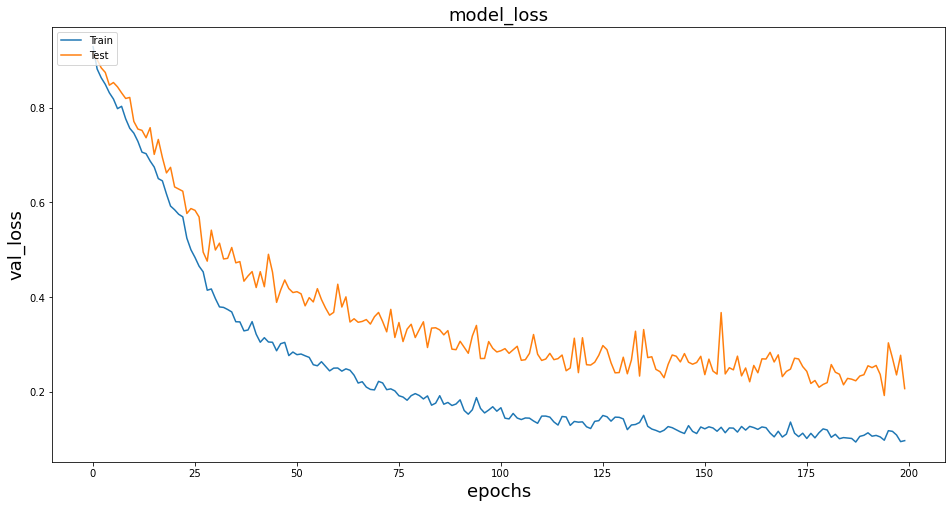

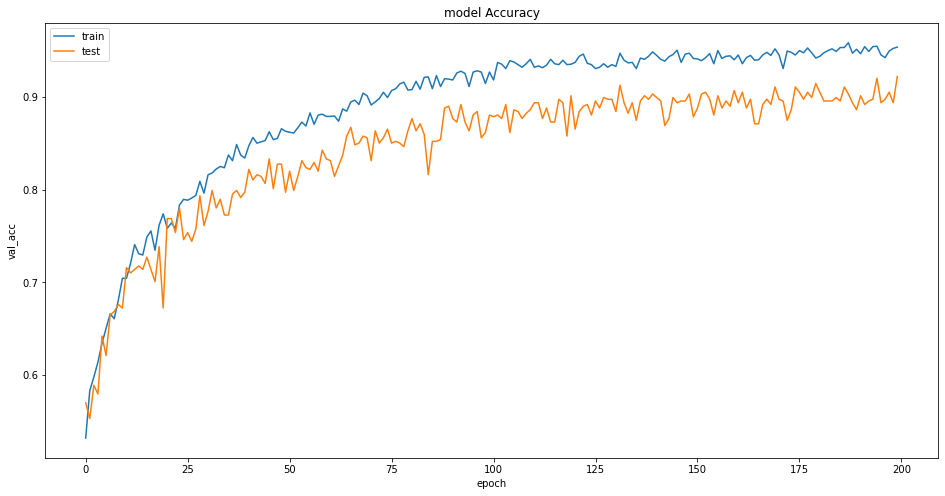

In [100]:
plot_loss_acc()

In [101]:
from sklearn.metrics import classification_report
y_pred=model.predict_classes(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92       243
         1.0       0.96      0.90      0.93       285

    accuracy                           0.92       528
   macro avg       0.92      0.92      0.92       528
weighted avg       0.92      0.92      0.92       528



In [102]:
y_pred.T

array([[1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
        0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
        1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
        1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
        1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
        1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
        1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
        1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 